In [1]:
# Import necessary libraries
import os
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder

# Download required NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

c:\Users\HP\OneDrive\Desktop\PROJECTS\MindReader\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:


# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str) or not text.strip():
        return "unknown"
    text = re.sub(r"https?://\S+|www\.\S+", "", text.lower())  # Remove URLs and convert to lowercase
    text = re.sub(r"<.*?>|[^\w\s]|\d+|#\w+|[\U00010000-\U0010ffff]", "", text)  # Clean text
    words = nltk.word_tokenize(text)  # Tokenize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize & remove stopwords
    return " ".join(words)

# Load original dataset
file_path = "data/emotion-emotion_69k.csv"
df = pd.read_csv(file_path)

# Shuffle dataset and take 10% as new test set
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_new_test = df_shuffled.head(int(len(df) * 0.1))

# Apply preprocessing to the 'Situation' column
df_new_test["Situation"] = df_new_test["Situation"].apply(preprocess_text)

# Fill missing emotions with 'unknown'
df_new_test["emotion"] = df_new_test["emotion"].fillna("unknown")

# Filter valid emotions
valid_emotions = [
    "sentimental", "afraid", "proud", "faithful", "terrified", "joyful",
    "angry", "sad", "jealous", "grateful", "prepared", "embarrassed",
    "excited", "annoyed", "lonely", "ashamed", "guilty", "surprised",
    "nostalgic", "confident", "furious", "disappointed", "caring",
    "trusting", "disgusted", "anticipating", "anxious", "hopeful",
    "content", "impressed", "apprehensive", "devastated"
]
df_new_test = df_new_test[df_new_test["emotion"].isin(valid_emotions)]

# Load existing label encoder classes
label_classes = np.load("data/label_encoder_classes.npy", allow_pickle=True)
label_encoder = LabelEncoder()
label_encoder.classes_ = label_classes

# Encode emotions
df_new_test["emotion_encoded"] = label_encoder.transform(df_new_test["emotion"])

# Create test_data directory if it doesn't exist
os.makedirs("test_data", exist_ok=True)

# Save preprocessed test dataset
preprocessed_new_test_path = "test_data/preprocessed_test_data.csv"
df_new_test.to_csv(preprocessed_new_test_path, index=False)
print(f"Preprocessed new test data saved to {preprocessed_new_test_path}.")




Preprocessed new test data saved to test_data/preprocessed_test_data.csv.


C:\Users\HP\AppData\Local\Temp\ipykernel_2044\3212216745.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_test["Situation"] = df_new_test["Situation"].apply(preprocess_text)
C:\Users\HP\AppData\Local\Temp\ipykernel_2044\3212216745.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_test["emotion"] = df_new_test["emotion"].fillna("unknown")


In [7]:
# Ensure index is reset after shuffling
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Shuffle and take 10% as the new test set
df_new_test = df_shuffled.head(int(len(df_shuffled) * 0.1))

# Apply preprocessing to the 'Situation' column
df_new_test["Situation"] = df_new_test["Situation"].apply(preprocess_text)

# Fill missing emotions with 'unknown'
df_new_test["emotion"] = df_new_test["emotion"].fillna("unknown")

# Filter valid emotions
valid_emotions = [
    "sentimental", "afraid", "proud", "faithful", "terrified", "joyful",
    "angry", "sad", "jealous", "grateful", "prepared", "embarrassed",
    "excited", "annoyed", "lonely", "ashamed", "guilty", "surprised",
    "nostalgic", "confident", "furious", "disappointed", "caring",
    "trusting", "disgusted", "anticipating", "anxious", "hopeful",
    "content", "impressed", "apprehensive", "devastated"
]
df_new_test = df_new_test[df_new_test["emotion"].isin(valid_emotions)]

# Encode emotions
df_new_test["emotion_encoded"] = label_encoder.transform(df_new_test["emotion"])

# Handle any NaN or empty strings in the "Situation" column before applying SBERT
df_new_test["Situation"] = df_new_test["Situation"].fillna("")

# Generate SBERT embeddings
X_new_test_embeddings = get_sbert_embeddings(df_new_test["Situation"].tolist())

# Save embeddings and labels in test_data folder
np.save("test_data/X_test_embeddings.npy", X_new_test_embeddings)
np.save("test_data/y_test.npy", df_new_test["emotion_encoded"].values)

print("New test data embeddings and labels saved successfully.")


C:\Users\HP\AppData\Local\Temp\ipykernel_2044\2831164576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_test["Situation"] = df_new_test["Situation"].apply(preprocess_text)
C:\Users\HP\AppData\Local\Temp\ipykernel_2044\2831164576.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_test["emotion"] = df_new_test["emotion"].fillna("unknown")
Batches: 100%|██████████| 202/202 [00:55<00:00,  3.65it/s]


New test data embeddings and labels saved successfully.


Evaluating CNN_GRU Model...
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9614 - loss: 0.1723
Test Loss: 0.1609
Test Accuracy: 0.9614
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

      afraid       0.87      0.97      0.92       216
       angry       0.93      0.91      0.92       212
     annoyed       0.99      0.98      0.98       213
anticipating       0.83      0.97      0.90       196
     anxious       0.95      0.95      0.95       201
apprehensive       0.97      0.92      0.94       155
     ashamed       1.00      0.93      0.96       170
      caring       0.96      0.99      0.97       202
   confident       0.98      0.99      0.98       227
     content       0.99      0.97      0.98       192
  devastated       0.95      0.97      0.96       209
disappointed       0.98      0.97      0.98       193
   disgusted       0.99      0.99      0.99       193
 embarrassed       0.99      0.99  

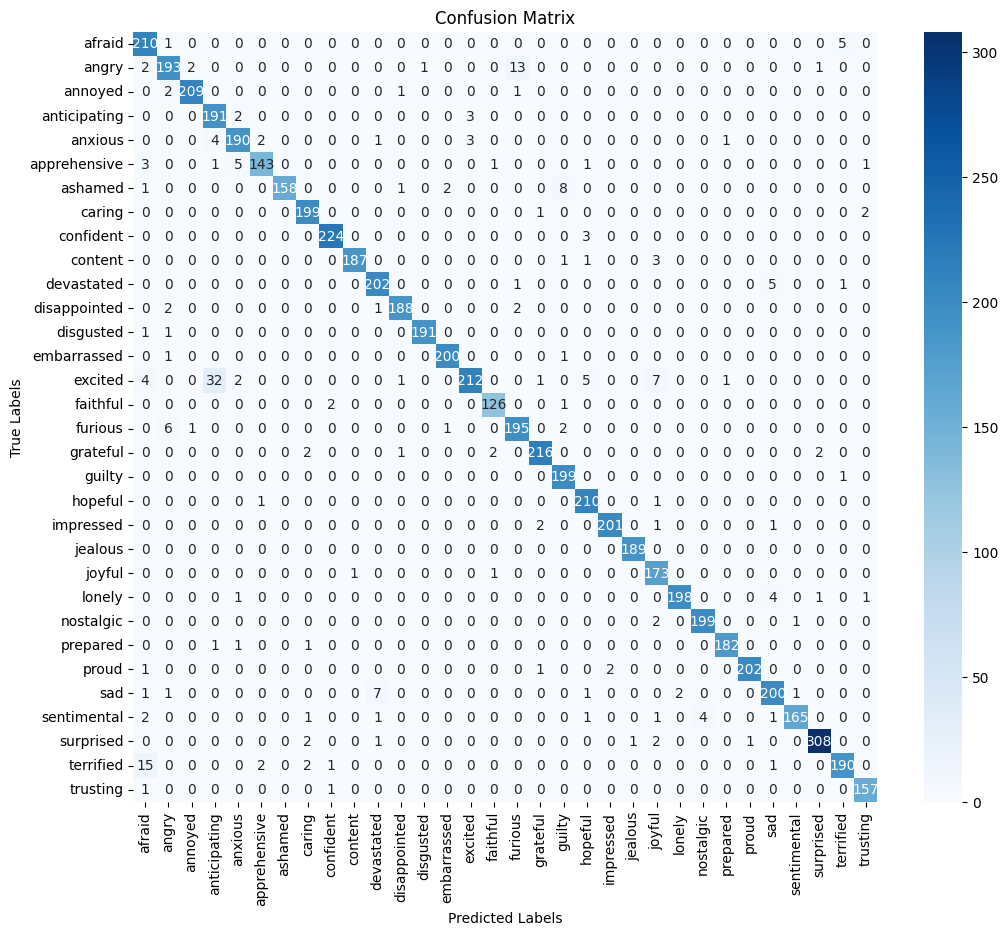


Per-Class Metrics:
           Class  Precision    Recall  F1-Score
0         afraid   0.871369  0.972222  0.919037
1          angry   0.932367  0.910377  0.921241
2        annoyed   0.985849  0.981221  0.983529
3   anticipating   0.834061  0.974490  0.898824
4        anxious   0.945274  0.945274  0.945274
5   apprehensive   0.966216  0.922581  0.943894
6        ashamed   1.000000  0.929412  0.963415
7         caring   0.961353  0.985149  0.973105
8      confident   0.982456  0.986784  0.984615
9        content   0.994681  0.973958  0.984211
10    devastated   0.948357  0.966507  0.957346
11  disappointed   0.979167  0.974093  0.976623
12     disgusted   0.994792  0.989637  0.992208
13   embarrassed   0.985222  0.990099  0.987654
14       excited   0.972477  0.800000  0.877847
15      faithful   0.969231  0.976744  0.972973
16       furious   0.919811  0.951220  0.935252
17      grateful   0.977376  0.968610  0.972973
18        guilty   0.938679  0.995000  0.966019
19       hopeful   0

<Figure size 1200x600 with 0 Axes>

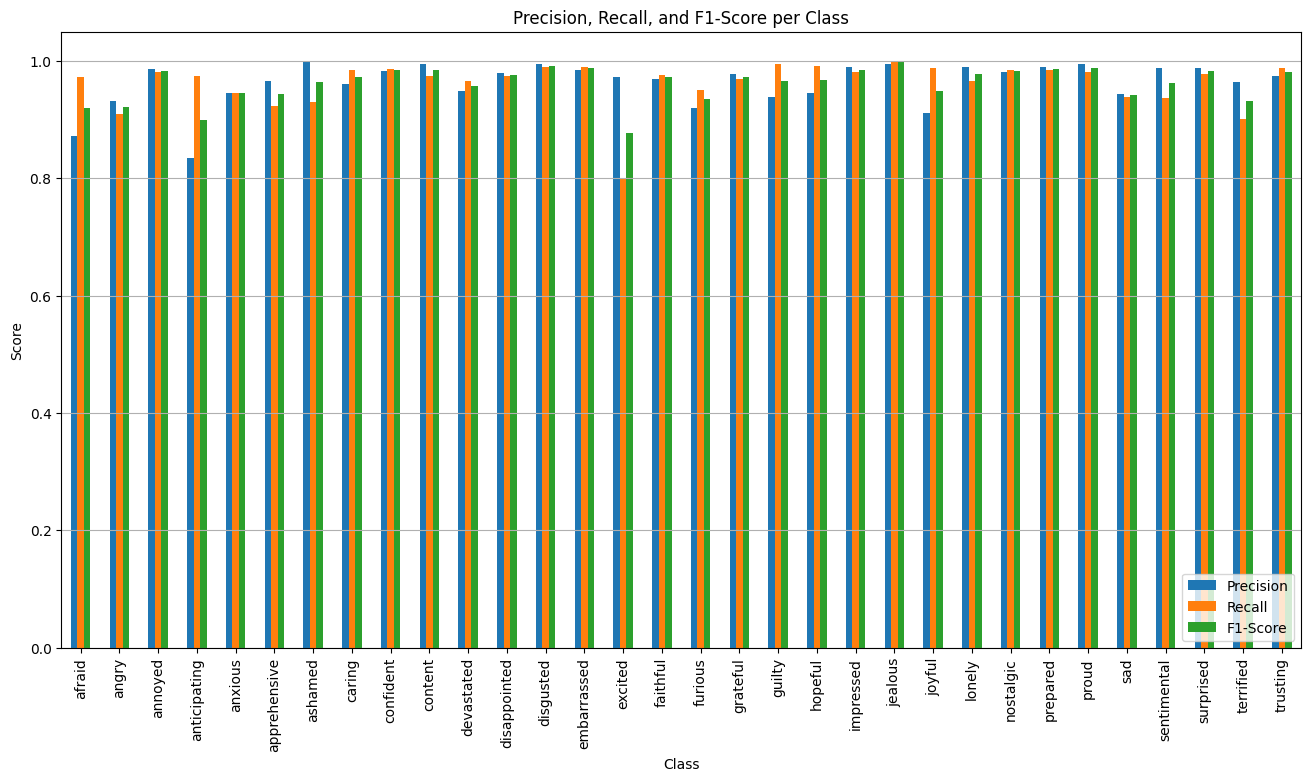

Evaluating CNN_BiGRU Model...
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9744 - loss: 0.1221
Test Loss: 0.1171
Test Accuracy: 0.9751
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

Classification Report:
              precision    recall  f1-score   support

      afraid       0.96      0.98      0.97       216
       angry       0.97      0.92      0.94       212
     annoyed       0.99      0.99      0.99       213
anticipating       0.99      0.93      0.96       196
     anxious       0.99      0.95      0.97       201
apprehensive       0.96      0.99      0.97       155
     ashamed       0.98      0.98      0.98       170
      caring       0.99      0.99      0.99       202
   confident       0.97      1.00      0.98       227
     content       0.98      0.99      0.99       192
  devastated       0.97      0.97      0.97       209
disappointed       0.98      0.97      0.98       193
   disgusted       1.00      0.98      0.99       193
 embarrassed       0.98      1.0

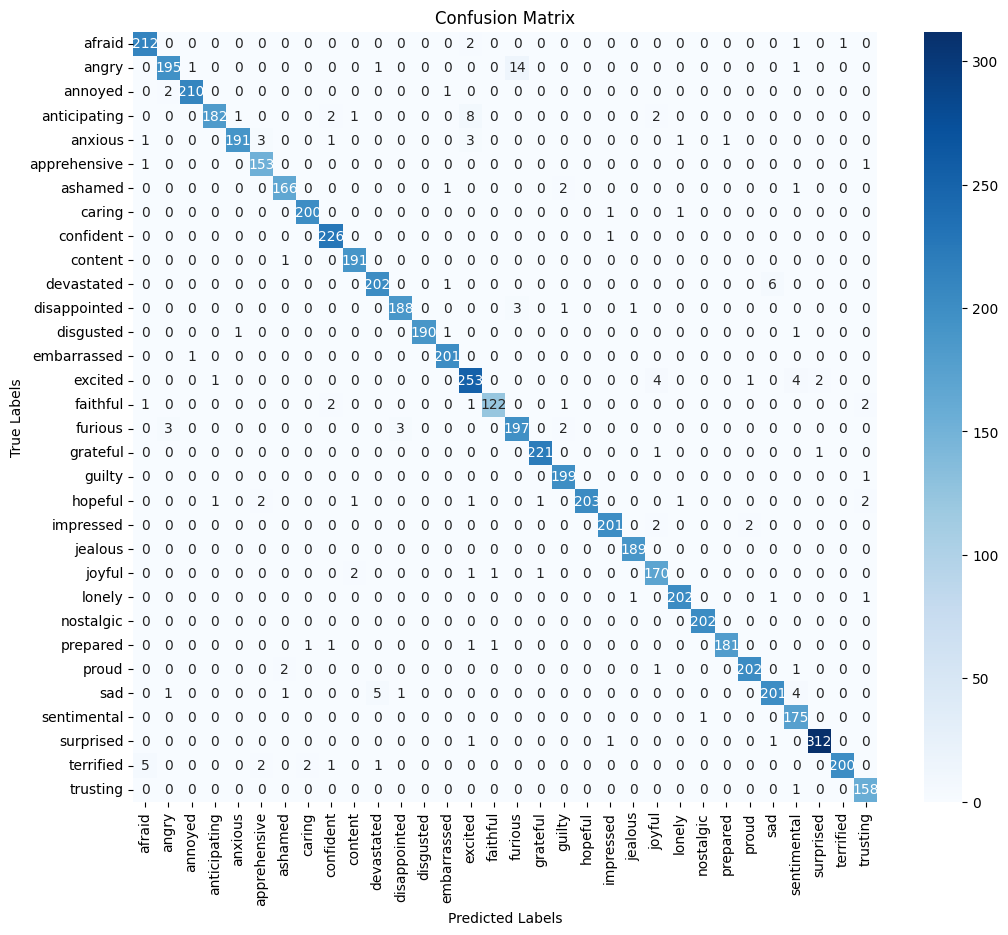


Per-Class Metrics:
           Class  Precision    Recall  F1-Score
0         afraid   0.963636  0.981481  0.972477
1          angry   0.970149  0.919811  0.944310
2        annoyed   0.990566  0.985915  0.988235
3   anticipating   0.989130  0.928571  0.957895
4        anxious   0.989637  0.950249  0.969543
5   apprehensive   0.956250  0.987097  0.971429
6        ashamed   0.976471  0.976471  0.976471
7         caring   0.985222  0.990099  0.987654
8      confident   0.969957  0.995595  0.982609
9        content   0.979487  0.994792  0.987080
10    devastated   0.966507  0.966507  0.966507
11  disappointed   0.979167  0.974093  0.976623
12     disgusted   1.000000  0.984456  0.992167
13   embarrassed   0.980488  0.995050  0.987715
14       excited   0.933579  0.954717  0.944030
15      faithful   0.983871  0.945736  0.964427
16       furious   0.920561  0.960976  0.940334
17      grateful   0.991031  0.991031  0.991031
18        guilty   0.970732  0.995000  0.982716
19       hopeful   1

<Figure size 1200x600 with 0 Axes>

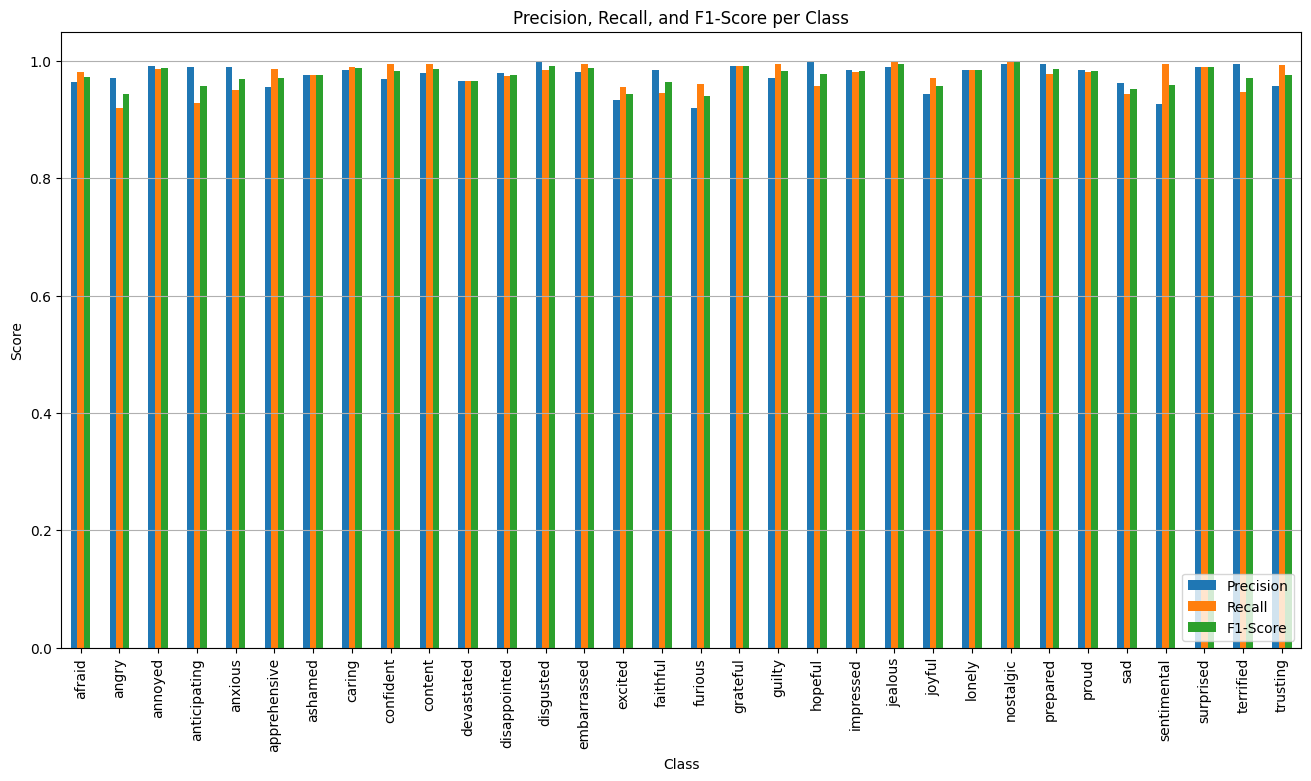

Evaluating CNN_LSTM Model...
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9660 - loss: 0.1363
Test Loss: 0.1402
Test Accuracy: 0.9647
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

      afraid       0.95      0.88      0.91       216
       angry       0.87      0.95      0.91       212
     annoyed       0.98      0.98      0.98       213
anticipating       0.92      0.94      0.93       196
     anxious       0.98      0.95      0.96       201
apprehensive       0.96      0.92      0.94       155
     ashamed       0.97      0.92      0.95       170
      caring       0.98      0.99      0.98       202
   confident       0.98      1.00      0.99       227
     content       0.99      0.98      0.99       192
  devastated       0.95      0.99      0.97       209
disappointed       0.98      0.93      0.95       193
   disgusted       0.98      0.98      0.98       193
 embarrassed       1.00      0.98 

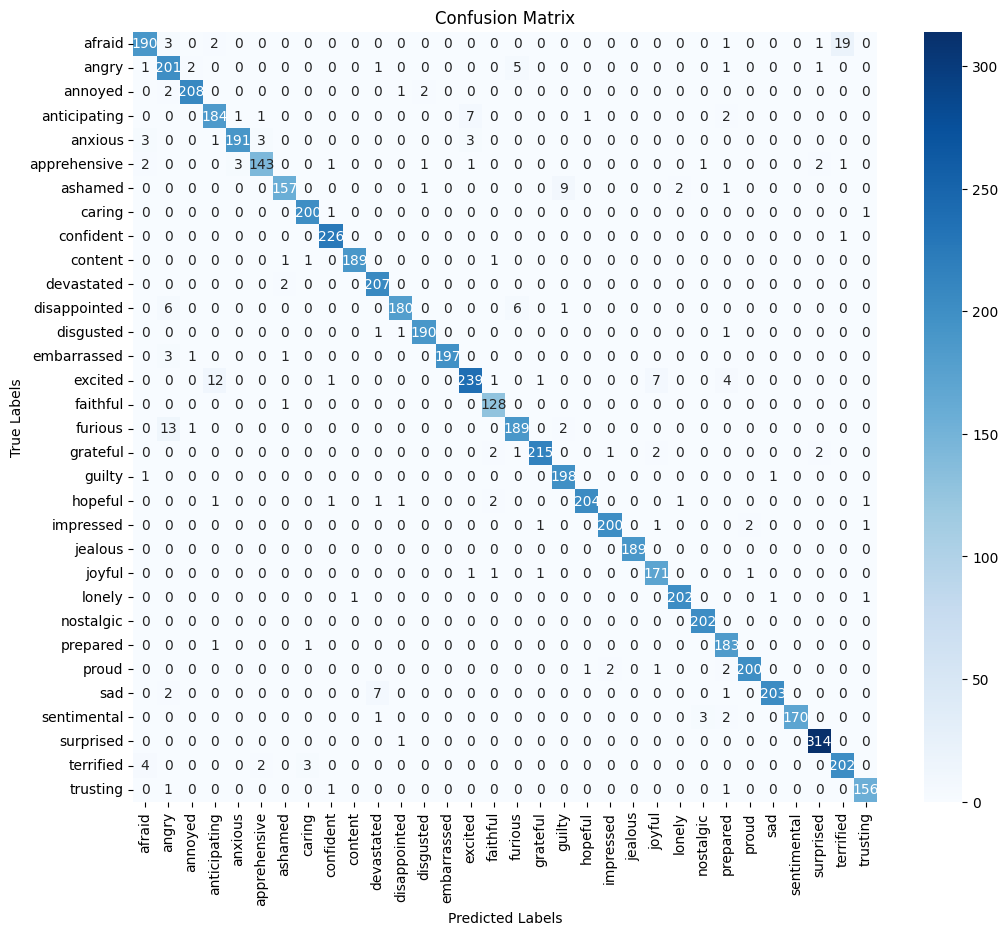


Per-Class Metrics:
           Class  Precision    Recall  F1-Score
0         afraid   0.945274  0.879630  0.911271
1          angry   0.870130  0.948113  0.907449
2        annoyed   0.981132  0.976526  0.978824
3   anticipating   0.915423  0.938776  0.926952
4        anxious   0.979487  0.950249  0.964646
5   apprehensive   0.959732  0.922581  0.940789
6        ashamed   0.969136  0.923529  0.945783
7         caring   0.975610  0.990099  0.982801
8      confident   0.978355  0.995595  0.986900
9        content   0.994737  0.984375  0.989529
10    devastated   0.949541  0.990431  0.969555
11  disappointed   0.978261  0.932642  0.954907
12     disgusted   0.979381  0.984456  0.981912
13   embarrassed   1.000000  0.975248  0.987469
14       excited   0.952191  0.901887  0.926357
15      faithful   0.948148  0.992248  0.969697
16       furious   0.940299  0.921951  0.931034
17      grateful   0.986239  0.964126  0.975057
18        guilty   0.942857  0.990000  0.965854
19       hopeful   0

<Figure size 1200x600 with 0 Axes>

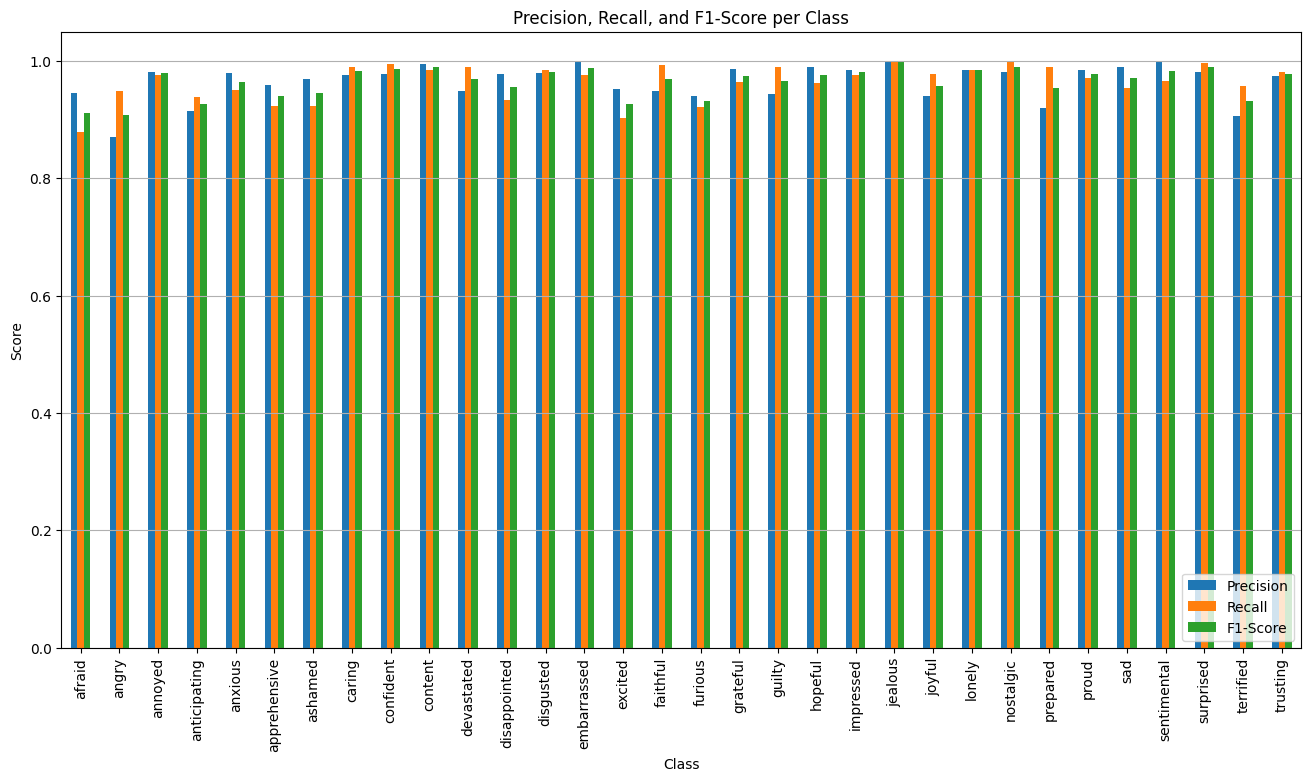

Evaluating CNN_BiLSTM Model...
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9784 - loss: 0.1156
Test Loss: 0.1118
Test Accuracy: 0.9782
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

Classification Report:
              precision    recall  f1-score   support

      afraid       0.99      0.94      0.96       216
       angry       0.94      0.97      0.95       212
     annoyed       0.99      0.99      0.99       213
anticipating       0.99      0.95      0.97       196
     anxious       0.99      0.98      0.98       201
apprehensive       0.97      0.99      0.98       155
     ashamed       1.00      0.98      0.99       170
      caring       0.98      0.97      0.97       202
   confident       0.99      1.00      0.99       227
     content       0.98      0.98      0.98       192
  devastated       0.97      0.98      0.98       209
disappointed       0.98      0.98      0.98       193
   disgusted       0.99      0.99      0.99       193
 embarrassed       1.00      1.0

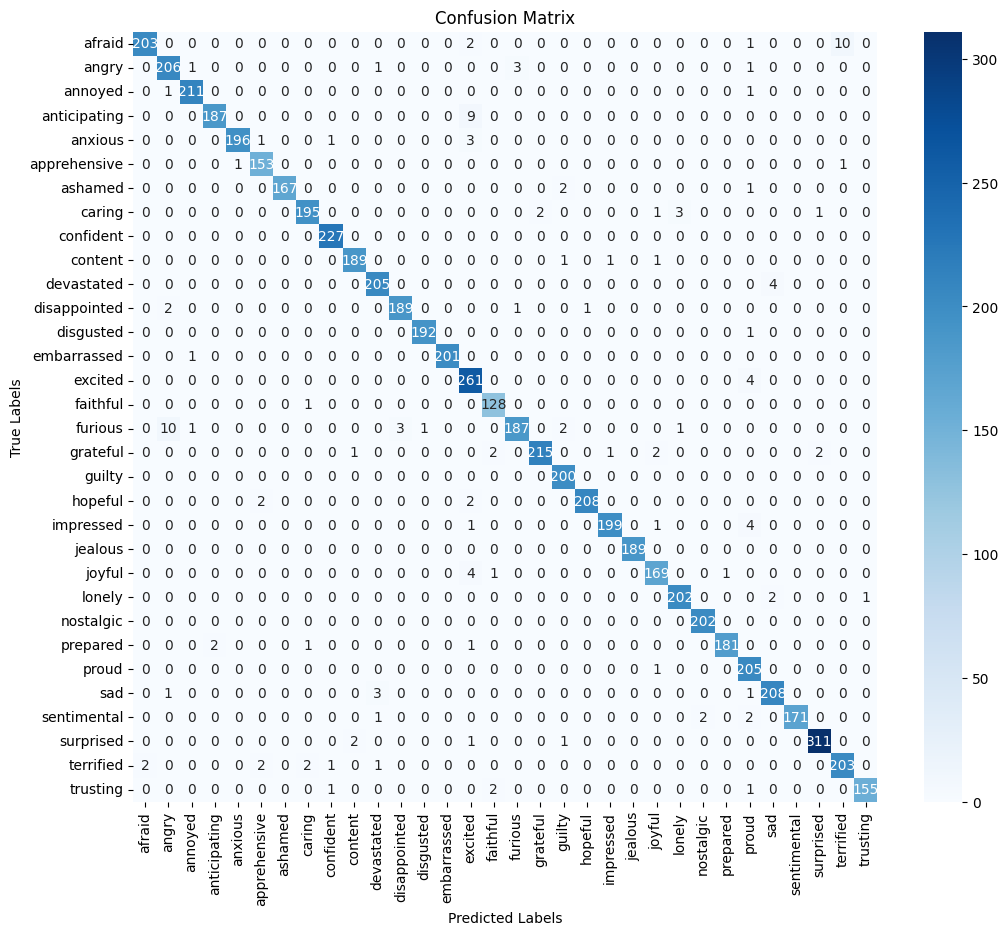


Per-Class Metrics:
           Class  Precision    Recall  F1-Score
0         afraid   0.990244  0.939815  0.964371
1          angry   0.936364  0.971698  0.953704
2        annoyed   0.985981  0.990610  0.988290
3   anticipating   0.989418  0.954082  0.971429
4        anxious   0.994924  0.975124  0.984925
5   apprehensive   0.968354  0.987097  0.977636
6        ashamed   1.000000  0.982353  0.991098
7         caring   0.979899  0.965347  0.972569
8      confident   0.986957  1.000000  0.993435
9        content   0.984375  0.984375  0.984375
10    devastated   0.971564  0.980861  0.976190
11  disappointed   0.984375  0.979275  0.981818
12     disgusted   0.994819  0.994819  0.994819
13   embarrassed   1.000000  0.995050  0.997519
14       excited   0.919014  0.984906  0.950820
15      faithful   0.962406  0.992248  0.977099
16       furious   0.979058  0.912195  0.944444
17      grateful   0.990783  0.964126  0.977273
18        guilty   0.970874  1.000000  0.985222
19       hopeful   0

<Figure size 1200x600 with 0 Axes>

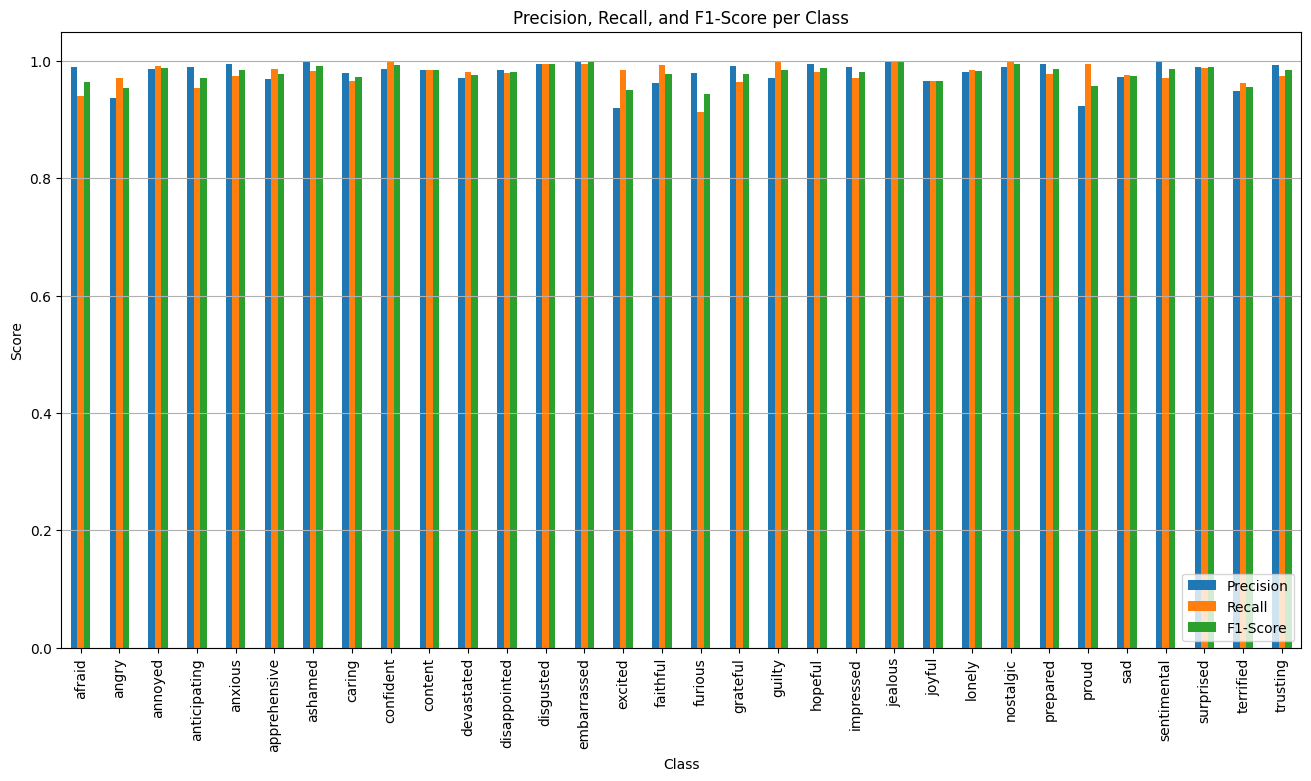

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load dataset and embeddings
DATASET_PATH = "test_data\preprocessed_test_data.csv"
EMBEDDINGS_TEST_PATH = "test_data\X_test_embeddings.npy"
y_test_path = "test_data\y_test.npy"

data = pd.read_csv(DATASET_PATH)
X_test_embeddings = np.load(EMBEDDINGS_TEST_PATH)
y_test = np.load(y_test_path)

label_encoder_classes = np.load("data/label_encoder_classes.npy", allow_pickle=True)
label_encoder = LabelEncoder()
label_encoder.classes_ = label_encoder_classes

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Predict probabilities and classes
    y_pred_probs = model.predict(X_test, verbose=1)
    y_pred = y_pred_probs.argmax(axis=1)

    # Convert y_test and y_pred to original labels
    y_test_labels = label_encoder.inverse_transform(y_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)

    # Classification Report
    print("\nClassification Report:")
    target_names = list(label_encoder.classes_.astype(str))
    print(classification_report(y_test_labels, y_pred_labels, target_names=target_names))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Additional Metrics: Precision, Recall, and F1-score
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    metrics_df = pd.DataFrame({
        "Class": target_names,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    })
    print("\nPer-Class Metrics:")
    print(metrics_df)

    # Plot Precision, Recall, F1-Score
    plt.figure(figsize=(12, 6))
    metrics_df.plot(x="Class", kind="bar", figsize=(16, 8))
    plt.title("Precision, Recall, and F1-Score per Class")
    plt.xlabel("Class")
    plt.ylabel("Score")
    plt.legend(loc="lower right")
    plt.grid(axis="y")
    plt.show()

# Load models and evaluate them
MODELS_PATH = "models"  # Path to models directory
models = {
    "CNN_GRU": os.path.join(MODELS_PATH, "CNN_GRU.pkl"),
    "CNN_BiGRU": os.path.join(MODELS_PATH, "CNN_BiGRU.pkl"),
    "CNN_LSTM": os.path.join(MODELS_PATH, "CNN_LSTM.pkl"),
    "CNN_BiLSTM": os.path.join(MODELS_PATH, "CNN_BiLSTM.pkl")
}

for model_name, model_path in models.items():
    print(f"Evaluating {model_name} Model...")

    # Load the model
    with open(model_path, "rb") as f:
        model = pickle.load(f)
    
    # Evaluate the model
    evaluate_model(model, X_test_embeddings, y_test)


Evaluating CNN_GRU Model...
Evaluating CNN_BiGRU Model...
Evaluating CNN_LSTM Model...
Evaluating CNN_BiLSTM Model...


C:\Users\HP\AppData\Local\Temp\ipykernel_17292\837313040.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


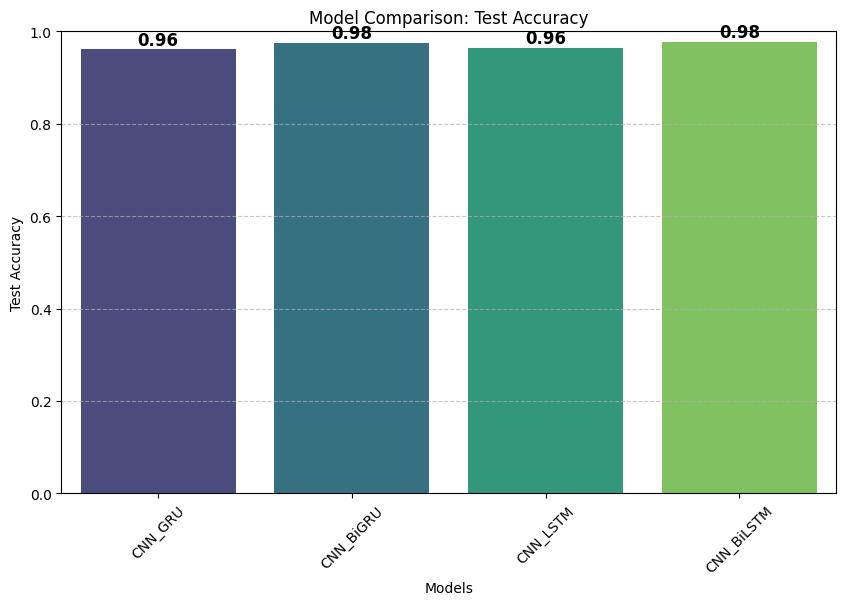

In [ ]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load dataset and embeddings
DATASET_PATH = "test_data/preprocessed_test_data.csv"
EMBEDDINGS_TEST_PATH = "test_data/X_test_embeddings.npy"
y_test_path = "test_data/y_test.npy"

data = pd.read_csv(DATASET_PATH)
X_test_embeddings = np.load(EMBEDDINGS_TEST_PATH)
y_test = np.load(y_test_path)

label_encoder_classes = np.load("data/label_encoder_classes.npy", allow_pickle=True)
label_encoder = LabelEncoder()
label_encoder.classes_ = label_encoder_classes

# Function to evaluate model and return test accuracy
def evaluate_model(model, X_test, y_test):
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)  # Suppress output for clean visualization
    return test_accuracy

# Load models and evaluate them
MODELS_PATH = "models"  # Path to models directory
models = {
    "CNN_GRU": os.path.join(MODELS_PATH, "CNN_GRU.pkl"),
    "CNN_BiGRU": os.path.join(MODELS_PATH, "CNN_BiGRU.pkl"),
    "CNN_LSTM": os.path.join(MODELS_PATH, "CNN_LSTM.pkl"),
    "CNN_BiLSTM": os.path.join(MODELS_PATH, "CNN_BiLSTM.pkl")
}

model_accuracies = {}

for model_name, model_path in models.items():
    print(f"Evaluating {model_name} Model...")

    # Load the model
    with open(model_path, "rb") as f:
        model = pickle.load(f)
    
    # Evaluate the model and store accuracy
    test_accuracy = evaluate_model(model, X_test_embeddings, y_test)
    model_accuracies[model_name] = test_accuracy

# Plot comparison of test accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Test Accuracy")
plt.title("Model Comparison: Test Accuracy")
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display values on bars
for i, acc in enumerate(model_accuracies.values()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center", fontsize=12, fontweight="bold")

# Show the plot
plt.show()
